# Whole Slide Image sampler module:

****
## Testing with:
```python
tensorflow==2.0.0rc0
```
social thing to do: <br>
email construction <br>
slides as html or pdf or google slides <br>

In [33]:
import IPython.display as ip_display
import os
import time

import sys
sys.path.insert(0, '../src/python')
from openslide_2_tfrecord_module import svs_file_to_patches_tfrecord, get_iterable_tfrecord


file_ext_list = ['.svs', '.tif', '.tiff']
def get_file_size_dict(data_dir, reverse_dict=False):
    """ Usage:
    file_size_dict = get_file_size_dict(data_dir)
    """
    file_size_dict = {}
    for f in os.listdir(data_dir):
        ff = os.path.join(data_dir, f)
        if os.path.isfile(ff): 
            _, f_ext = os.path.splitext(ff)
            if f_ext in file_ext_list:
                file_size_dict[ff] = os.path.getsize(ff)
                
    return file_size_dict


In [34]:
data_dir = '../../DigiPath_MLTK_data/Aperio'
file_size_dict = get_file_size_dict(data_dir)
rev_file_size_dict = {v:k for k, v in file_size_dict.items()}
print(len(file_size_dict), len(rev_file_size_dict), '\t<< no duplicates if equal')

ordered_keys = sorted(list(file_size_dict.values()))
files_list = []
for k in ordered_keys:
    files_list.append(rev_file_size_dict[k])

print('\nordered by size:\n')
count = 0
for f in files_list:
    _, f_only = os.path.split(f)
    print('%3i %30s: %i'%(count, f_only, file_size_dict[f]))
    count += 1

7 7

ordered by size:

  0         CMU-1-Small-Region.svs: 1938955
  1               JP2K-33003-1.svs: 63847265
  2           CMU-1-JP2K-33005.svs: 132565343
  3                      CMU-1.svs: 177552579
  4                      CMU-3.svs: 253815723
  5               JP2K-33003-2.svs: 289250433
  6                      CMU-2.svs: 390750635


In [5]:
svs_file_name = os.path.join(data_dir, files_list[2])
output_dir = '../../DigiPath_MLTK_data/module_test'
patch_height = 224
patch_width = 224
patch_size = [patch_height, patch_width]
patch_keep_threshold = 0.5

start_call_time = time.time()
svs_file_conversion_dict = svs_file_to_patches_tfrecord(svs_file_name, 
                                                             output_dir, 
                                                             patch_size, 
                                                             patch_keep_threshold)

tfrecord_file_name = svs_file_conversion_dict['tfrecord_file_name']
number_of_patches = svs_file_conversion_dict['number_of_patches']
mask_dict = svs_file_conversion_dict['mask_dict']
temp_dir = svs_file_conversion_dict['temp_dir']
# ip_display.display(mask_dict['thumb_mask'])

total_run_time = time.time() - start_call_time
print('\n\ntfrecord_file_name\n\t%s\n%i patches in %0.3f seconds run time\n'%(tfrecord_file_name, 
                                                                              number_of_patches, 
                                                                              total_run_time))



tfrecord_file_name
	../../DigiPath_MLTK_data/module_test/CMU-1-JP2K-33005.tfrecords
4182 patches in 43.168 seconds run time



### largest run 390,750,635 file size
```text
tfrecord_file_name
	../../DigiPath_MLTK_data/module_test/CMU-2.tfrecords
5561 patches in 73.864 seconds run time
```
## View the tfrecord files:

In [6]:
dk2 = get_iterable_tfrecord(tfrecord_file_name).__iter__()

tf.Tensor(22, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_30111_30334.jpg', shape=(), dtype=string)


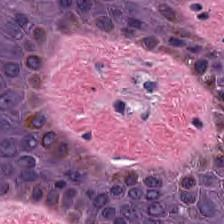

In [31]:
try:
    dakine = dk2.next()
    print(dakine['label'], dakine['image_name'])
    image_raw = dakine['image_raw'].numpy()
    ip_display.display(ip_display.Image(data=image_raw))
except StopIteration:
    print('dakine is empty')
    pass

tf.Tensor(0, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1160_1383_col_29663_29886.jpg', shape=(), dtype=string)


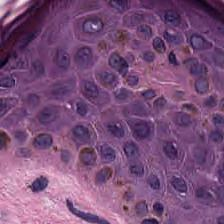

tf.Tensor(1, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1160_1383_col_29887_30110.jpg', shape=(), dtype=string)


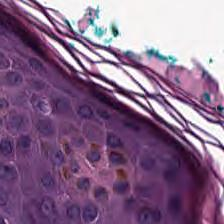

tf.Tensor(2, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1160_1383_col_30111_30334.jpg', shape=(), dtype=string)


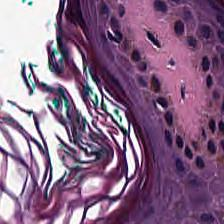

tf.Tensor(3, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1384_1607_col_29215_29438.jpg', shape=(), dtype=string)


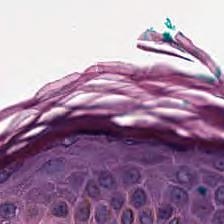

tf.Tensor(4, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1384_1607_col_29439_29662.jpg', shape=(), dtype=string)


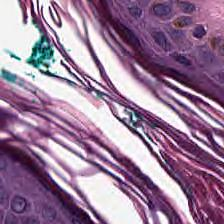

tf.Tensor(5, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1384_1607_col_29663_29886.jpg', shape=(), dtype=string)


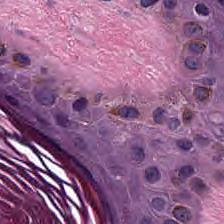

tf.Tensor(6, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1384_1607_col_29887_30110.jpg', shape=(), dtype=string)


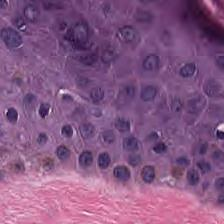

tf.Tensor(7, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1384_1607_col_30111_30334.jpg', shape=(), dtype=string)


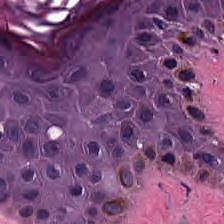

tf.Tensor(8, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1384_1607_col_30335_30558.jpg', shape=(), dtype=string)


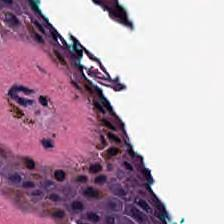

tf.Tensor(9, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1608_1831_col_28991_29214.jpg', shape=(), dtype=string)


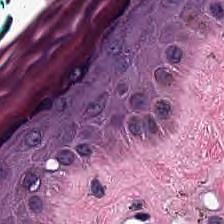

tf.Tensor(10, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1608_1831_col_29215_29438.jpg', shape=(), dtype=string)


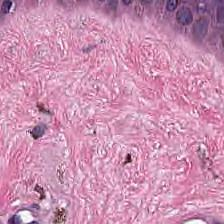

tf.Tensor(11, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1608_1831_col_29439_29662.jpg', shape=(), dtype=string)


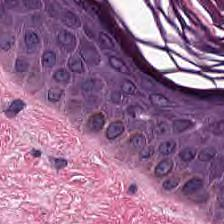

tf.Tensor(12, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1608_1831_col_29663_29886.jpg', shape=(), dtype=string)


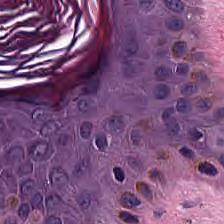

tf.Tensor(13, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1608_1831_col_29887_30110.jpg', shape=(), dtype=string)


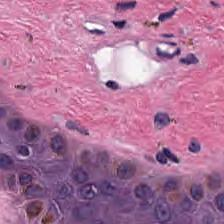

tf.Tensor(14, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1608_1831_col_30111_30334.jpg', shape=(), dtype=string)


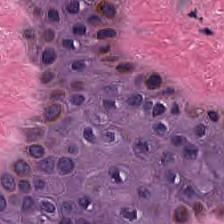

tf.Tensor(15, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1608_1831_col_30335_30558.jpg', shape=(), dtype=string)


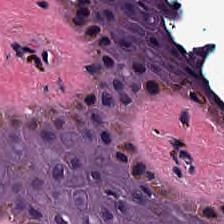

tf.Tensor(16, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_28767_28990.jpg', shape=(), dtype=string)


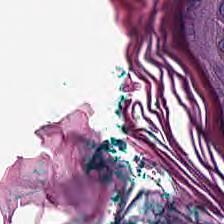

tf.Tensor(17, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_28991_29214.jpg', shape=(), dtype=string)


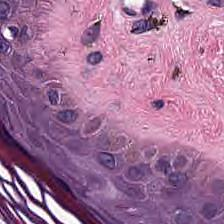

tf.Tensor(18, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_29215_29438.jpg', shape=(), dtype=string)


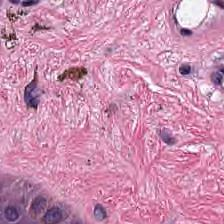

tf.Tensor(19, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_29439_29662.jpg', shape=(), dtype=string)


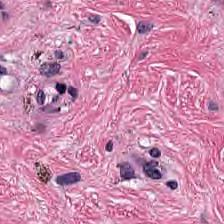

tf.Tensor(20, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_29663_29886.jpg', shape=(), dtype=string)


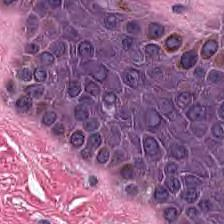

tf.Tensor(21, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_29887_30110.jpg', shape=(), dtype=string)


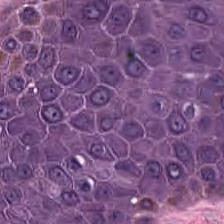

tf.Tensor(22, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_30111_30334.jpg', shape=(), dtype=string)


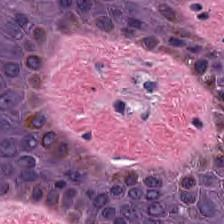

tf.Tensor(23, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_30335_30558.jpg', shape=(), dtype=string)


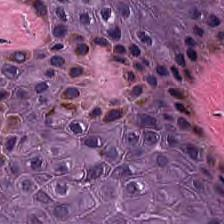

tf.Tensor(24, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_1832_2055_col_30559_30782.jpg', shape=(), dtype=string)


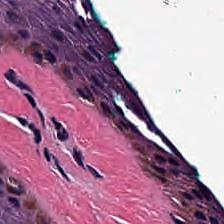

tf.Tensor(25, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_28767_28990.jpg', shape=(), dtype=string)


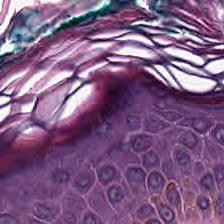

tf.Tensor(26, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_28991_29214.jpg', shape=(), dtype=string)


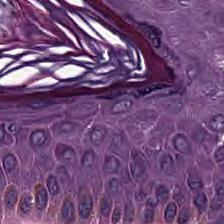

tf.Tensor(27, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_29215_29438.jpg', shape=(), dtype=string)


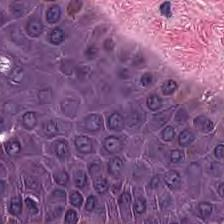

tf.Tensor(28, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_29439_29662.jpg', shape=(), dtype=string)


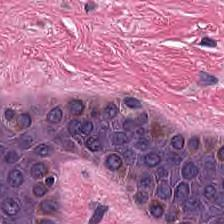

tf.Tensor(29, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_29663_29886.jpg', shape=(), dtype=string)


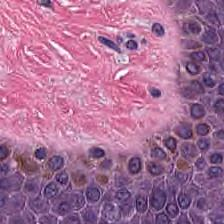

tf.Tensor(30, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_29887_30110.jpg', shape=(), dtype=string)


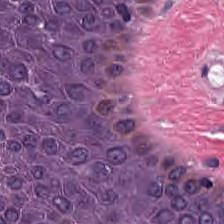

tf.Tensor(31, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_30111_30334.jpg', shape=(), dtype=string)


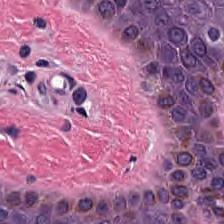

tf.Tensor(32, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_30335_30558.jpg', shape=(), dtype=string)


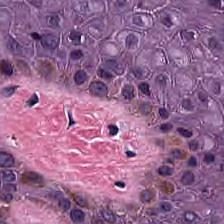

tf.Tensor(33, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2056_2279_col_30559_30782.jpg', shape=(), dtype=string)


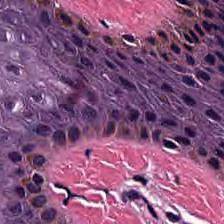

tf.Tensor(34, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_28543_28766.jpg', shape=(), dtype=string)


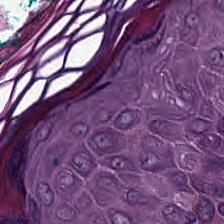

tf.Tensor(35, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_28767_28990.jpg', shape=(), dtype=string)


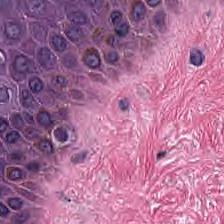

tf.Tensor(36, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_28991_29214.jpg', shape=(), dtype=string)


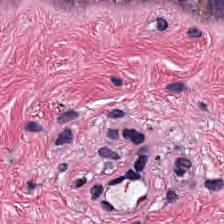

tf.Tensor(37, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_29215_29438.jpg', shape=(), dtype=string)


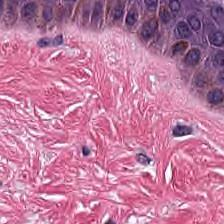

tf.Tensor(38, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_29439_29662.jpg', shape=(), dtype=string)


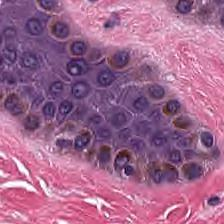

tf.Tensor(39, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_29663_29886.jpg', shape=(), dtype=string)


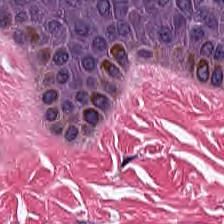

tf.Tensor(40, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_29887_30110.jpg', shape=(), dtype=string)


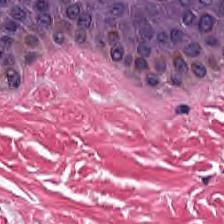

tf.Tensor(41, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_30111_30334.jpg', shape=(), dtype=string)


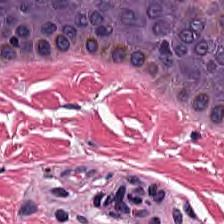

tf.Tensor(42, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_30335_30558.jpg', shape=(), dtype=string)


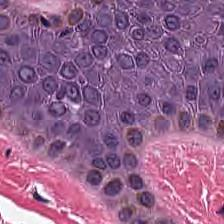

tf.Tensor(43, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_30559_30782.jpg', shape=(), dtype=string)


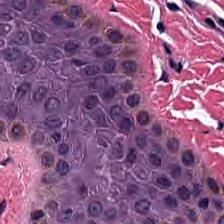

tf.Tensor(44, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2280_2503_col_30783_31006.jpg', shape=(), dtype=string)


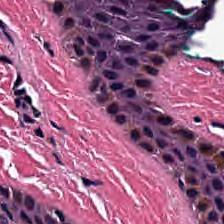

tf.Tensor(45, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_28319_28542.jpg', shape=(), dtype=string)


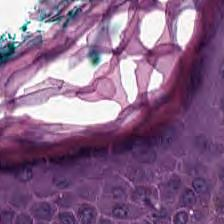

tf.Tensor(46, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_28543_28766.jpg', shape=(), dtype=string)


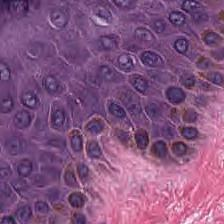

tf.Tensor(47, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_28767_28990.jpg', shape=(), dtype=string)


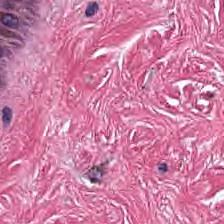

tf.Tensor(48, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_28991_29214.jpg', shape=(), dtype=string)


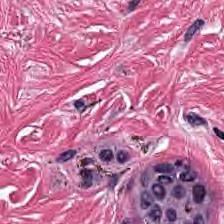

tf.Tensor(49, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_29215_29438.jpg', shape=(), dtype=string)


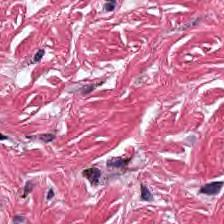

tf.Tensor(50, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_29439_29662.jpg', shape=(), dtype=string)


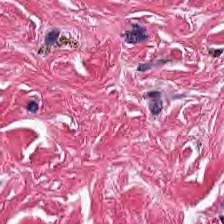

tf.Tensor(51, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_29663_29886.jpg', shape=(), dtype=string)


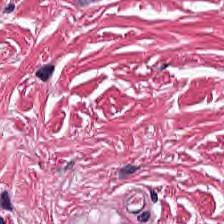

tf.Tensor(52, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_29887_30110.jpg', shape=(), dtype=string)


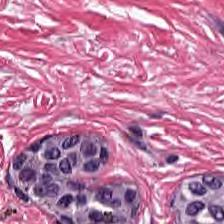

tf.Tensor(53, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_30111_30334.jpg', shape=(), dtype=string)


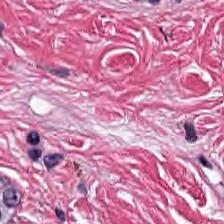

tf.Tensor(54, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_30335_30558.jpg', shape=(), dtype=string)


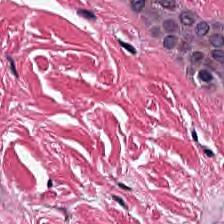

tf.Tensor(55, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_30559_30782.jpg', shape=(), dtype=string)


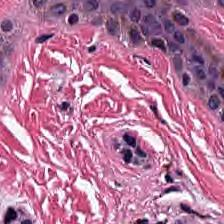

tf.Tensor(56, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_30783_31006.jpg', shape=(), dtype=string)


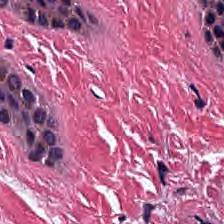

tf.Tensor(57, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2504_2727_col_31007_31230.jpg', shape=(), dtype=string)


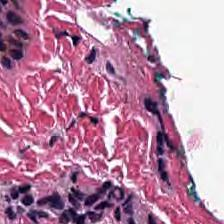

tf.Tensor(58, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_28095_28318.jpg', shape=(), dtype=string)


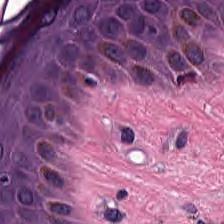

tf.Tensor(59, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_28319_28542.jpg', shape=(), dtype=string)


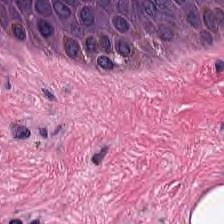

tf.Tensor(60, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_28543_28766.jpg', shape=(), dtype=string)


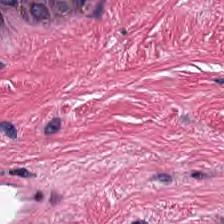

tf.Tensor(61, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_28767_28990.jpg', shape=(), dtype=string)


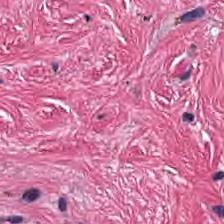

tf.Tensor(62, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_28991_29214.jpg', shape=(), dtype=string)


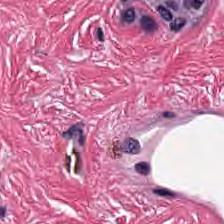

tf.Tensor(63, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_29215_29438.jpg', shape=(), dtype=string)


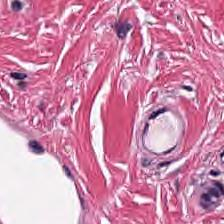

tf.Tensor(64, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_29439_29662.jpg', shape=(), dtype=string)


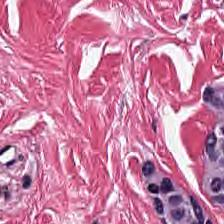

tf.Tensor(65, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_29663_29886.jpg', shape=(), dtype=string)


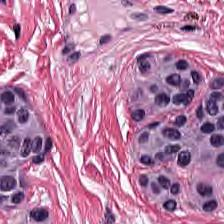

tf.Tensor(66, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_29887_30110.jpg', shape=(), dtype=string)


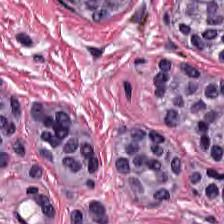

tf.Tensor(67, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_30111_30334.jpg', shape=(), dtype=string)


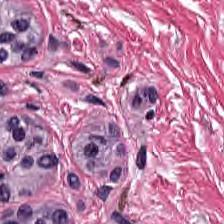

tf.Tensor(68, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_30335_30558.jpg', shape=(), dtype=string)


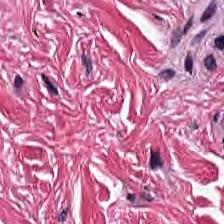

tf.Tensor(69, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_30559_30782.jpg', shape=(), dtype=string)


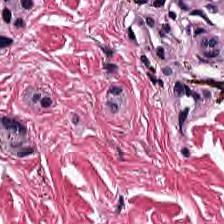

tf.Tensor(70, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_30783_31006.jpg', shape=(), dtype=string)


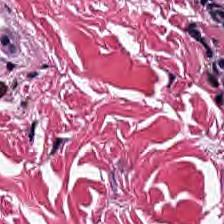

tf.Tensor(71, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_31007_31230.jpg', shape=(), dtype=string)


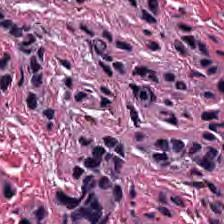

tf.Tensor(72, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2728_2951_col_31231_31454.jpg', shape=(), dtype=string)


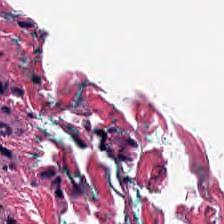

tf.Tensor(73, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_27871_28094.jpg', shape=(), dtype=string)


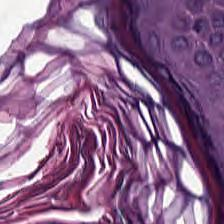

tf.Tensor(74, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_28095_28318.jpg', shape=(), dtype=string)


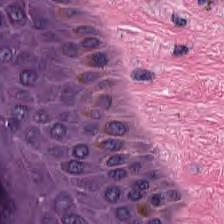

tf.Tensor(75, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_28319_28542.jpg', shape=(), dtype=string)


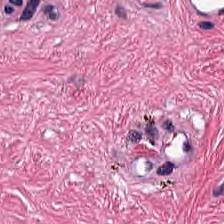

tf.Tensor(76, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_28543_28766.jpg', shape=(), dtype=string)


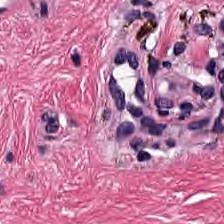

tf.Tensor(77, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_28767_28990.jpg', shape=(), dtype=string)


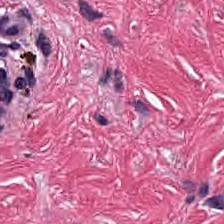

tf.Tensor(78, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_28991_29214.jpg', shape=(), dtype=string)


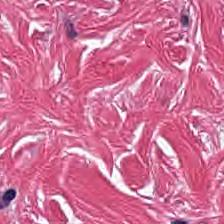

tf.Tensor(79, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_29215_29438.jpg', shape=(), dtype=string)


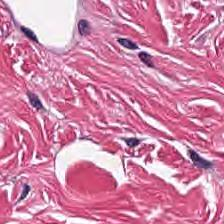

tf.Tensor(80, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_29439_29662.jpg', shape=(), dtype=string)


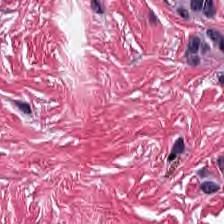

tf.Tensor(81, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_29663_29886.jpg', shape=(), dtype=string)


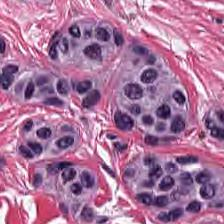

tf.Tensor(82, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_29887_30110.jpg', shape=(), dtype=string)


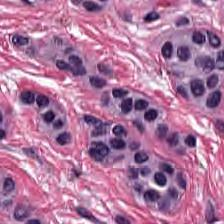

tf.Tensor(83, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_30111_30334.jpg', shape=(), dtype=string)


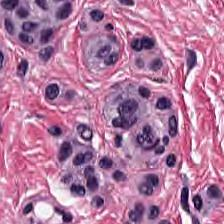

tf.Tensor(84, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_30335_30558.jpg', shape=(), dtype=string)


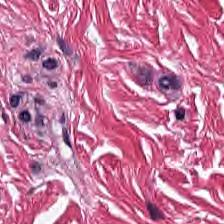

tf.Tensor(85, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_30559_30782.jpg', shape=(), dtype=string)


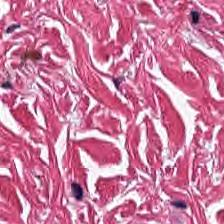

tf.Tensor(86, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_30783_31006.jpg', shape=(), dtype=string)


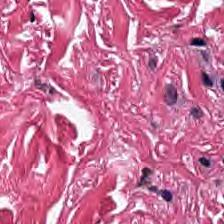

tf.Tensor(87, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_31007_31230.jpg', shape=(), dtype=string)


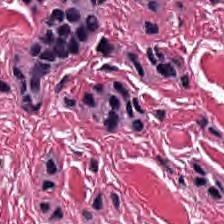

tf.Tensor(88, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_2952_3175_col_31231_31454.jpg', shape=(), dtype=string)


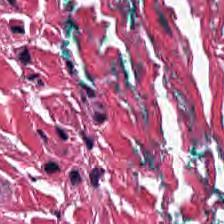

tf.Tensor(89, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_27871_28094.jpg', shape=(), dtype=string)


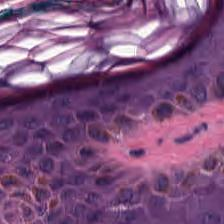

tf.Tensor(90, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_28095_28318.jpg', shape=(), dtype=string)


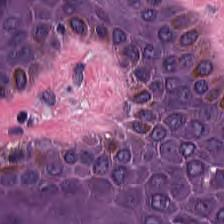

tf.Tensor(91, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_28319_28542.jpg', shape=(), dtype=string)


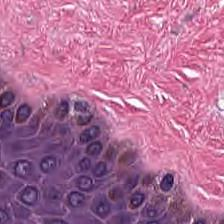

tf.Tensor(92, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_28543_28766.jpg', shape=(), dtype=string)


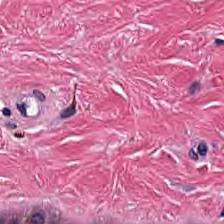

tf.Tensor(93, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_28767_28990.jpg', shape=(), dtype=string)


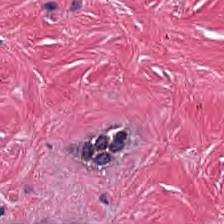

tf.Tensor(94, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_28991_29214.jpg', shape=(), dtype=string)


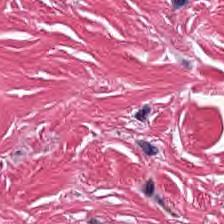

tf.Tensor(95, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_29215_29438.jpg', shape=(), dtype=string)


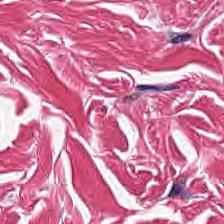

tf.Tensor(96, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_29439_29662.jpg', shape=(), dtype=string)


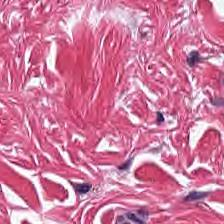

tf.Tensor(97, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_29663_29886.jpg', shape=(), dtype=string)


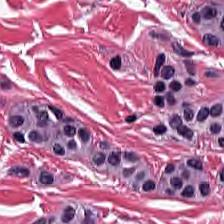

tf.Tensor(98, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_29887_30110.jpg', shape=(), dtype=string)


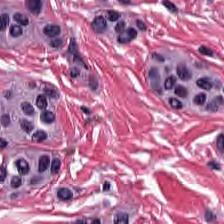

tf.Tensor(99, shape=(), dtype=int64) tf.Tensor(b'CMU-1-JP2K-33005_row_3176_3399_col_30111_30334.jpg', shape=(), dtype=string)


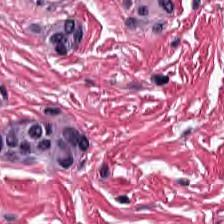

In [8]:
iterable_tfrecord = get_iterable_tfrecord(tfrecord_file_name)

n_to_show = 100
for dakine in iterable_tfrecord.take(n_to_show):
    print(dakine['label'], dakine['image_name'])
    image_raw = dakine['image_raw'].numpy()
    ip_display.display(ip_display.Image(data=image_raw))

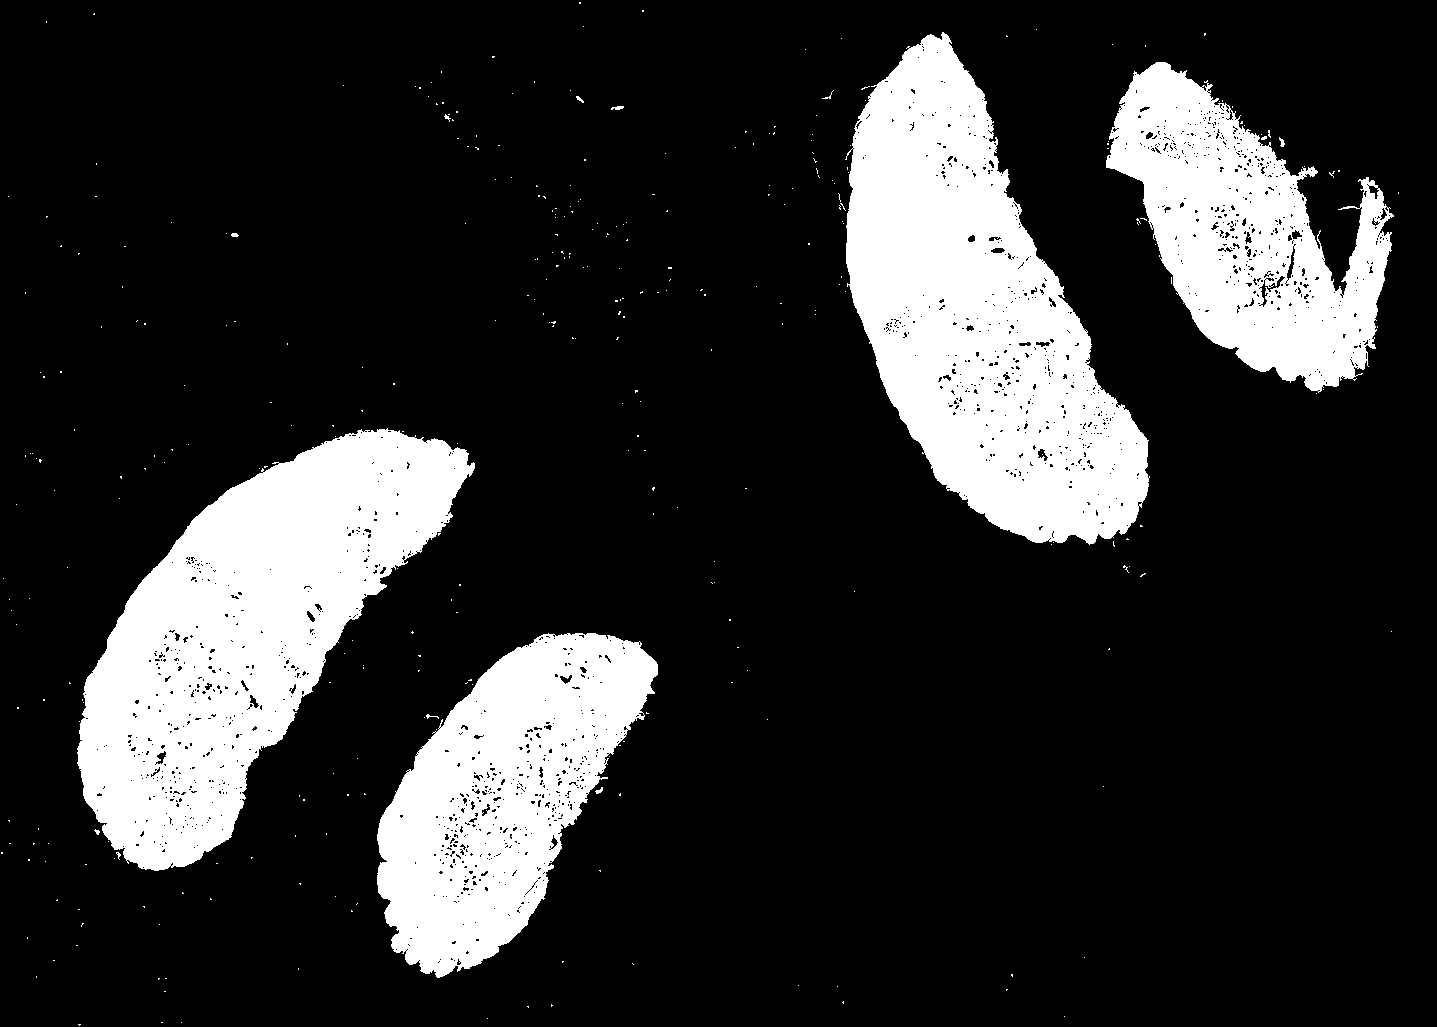

In [9]:
ip_display.display(mask_dict['thumb_mask'])

In [32]:
help(svs_file_to_patches_tfrecord)

Help on function svs_file_to_patches_tfrecord in module openslide_2_tfrecord_module:

svs_file_to_patches_tfrecord(svs_file_name, output_dir, patch_size, drop_threshold, file_ext=None)
    Usage:
    report_dict = svs_file_to_patches_tfrecord(svs_file_name, output_dir, patch_size, drop_threshold, file_ext)
    
    Args:
        svs_file_name:   accessable path file name
        output_dir:      writeable directory for the tfrecord
        patch_size:      list of integers: [224, 224] or an integer if square
        drop_threshold:  number between 0 & 1 -- if the masked area of the patch is smaller it is included
        file_ext:        default is '.jpg' ('.png') was tested (Note the period is included)
        
    Returns:
        svs_file_conversion_dict:  {'mask_dict': mask_dict, 
                                    'tfrecord_file_name': tfrecord_file_name, 
                                    'number_of_patches': seq_number, 
                                    'temp_dir': temp_d